<a href="https://colab.research.google.com/github/Priyatham10/Python_Data_Science_Toolbox/blob/master/kernel_Fruits_360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of the art classification for 120 different varieties of fruits and vegetables

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/fastbook

/content/drive/My Drive/fastbook


In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

**I am using fastai library. It is high level framework written on top of Pytorch to include all the best practices and provide fuctions that are implemented with the best defaults that works for all kinds of Deep Learning tasks.**

In [4]:
%mkdir fruits_data
%cd fruits_data

/content/drive/My Drive/fastbook/fruits_data


**Get the data from [here](https://www.kaggle.com/moltean/fruits). This is deataset hosted in kaggle.**

In [0]:
root_dir = "/content/drive/My Drive/"
working_dir = f"{root_dir}/fastbook/fruits_data/fruits-360_dataset"

In [36]:
!pwd

/content/drive/My Drive/fastbook/fruits_data


In [0]:
img_path = Path(working_dir)/'fruits-360'

In [38]:
img_path

PosixPath('/content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360')

In [39]:
len(Path(img_path/'Training').ls())

120

In [0]:
path_train = img_path/'Training'
path_test = img_path/'Test'

In [0]:
tfms = get_transforms(flip_vert=True, do_flip=True)

**We do the transformations of the images. This process is called as data augmentation. This makes of our model robust to whether images are flipped horizontally and vertically from the above transformations.**

In [0]:
data = ImageDataBunch.from_folder(img_path, train='Training', test='Test', size=100, valid_pct=0.2, ds_tfms=tfms)

In [43]:
data

ImageDataBunch;

Train: LabelList (48484 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Apple Braeburn,Apple Braeburn,Apple Braeburn,Apple Braeburn,Apple Braeburn
Path: /content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360;

Valid: LabelList (12120 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Carambula,Tangelo,Kohlrabi,Apple Granny Smith,Apple Red Yellow 1
Path: /content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360;

Test: LabelList (20622 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360

**ImageDataBunch is used to create the data that our model can use which is equivalent to DataLoaders in Pytorch. It is created using the training and the testing data which we downloaded from the kaggle. We used the 20% of data for validation of the model we create.**

In [44]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (48484 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Apple Braeburn,Apple Braeburn,Apple Braeburn,Apple Braeburn,Apple Braeburn
Path: /content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360;

Valid: LabelList (12120 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: CategoryList
Carambula,Tangelo,Kohlrabi,Apple Granny Smith,Apple Red Yellow 1
Path: /content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360;

Test: LabelList (20622 items)
x: ImageList
Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100),Image (3, 100, 100)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/fastbook/fruits_data/fruits-360_dataset/fruits-360

**It's very important to normalize our data to the ImageNet stats as we will get the pre-trained weights of the ImageNet data trained on trained on the resnet architecture.**

**Let's watch some data**

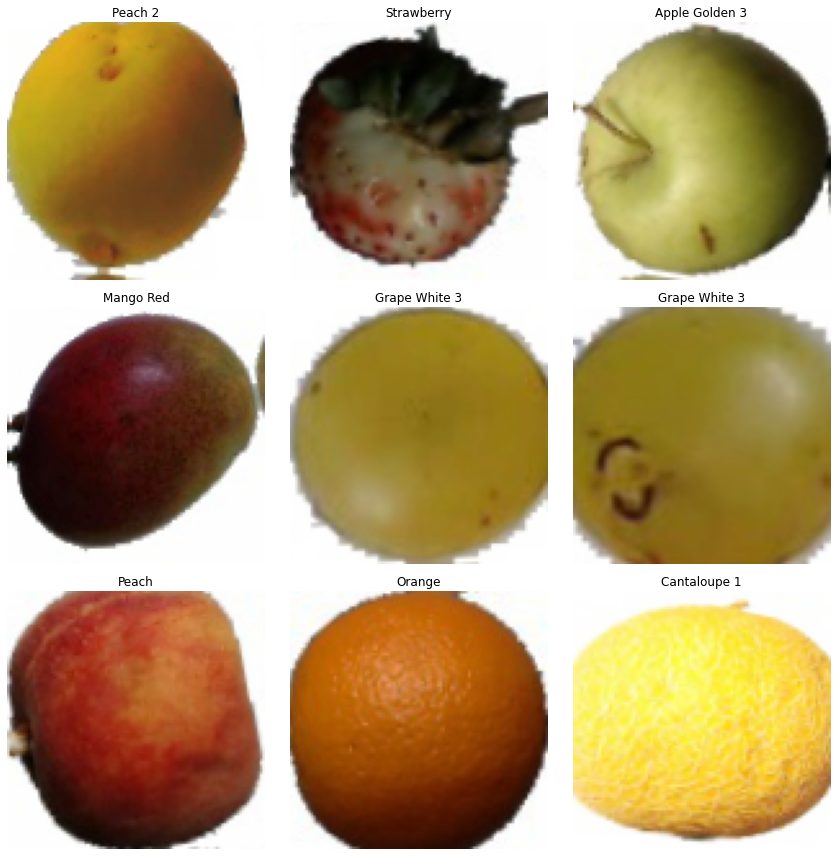

In [45]:
data.show_batch(rows=3)

In [46]:
learner_34 = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


*cnn_learner* **is a class implemented in fastai and is used to get the pretrained resnet model on Imagenet data here.**

In [47]:
learner_34.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.263254,0.075870,0.974257,04:18
1,0.093723,0.024205,0.992739,04:26
2,0.046604,0.013115,0.996122,04:29
3,0.025455,0.009295,0.996865,04:34


The **One-Cycle Policy** that is used for training ! It can also produce what is called super convergence (see https://sgugger.github.io/the-1cycle-policy.html for a really good blog post from Sylvian Gugger(one of the main person behind fastai2)

In [48]:
interp = ClassificationInterpretation.from_learner(learner_34)

**Plotting the losses**

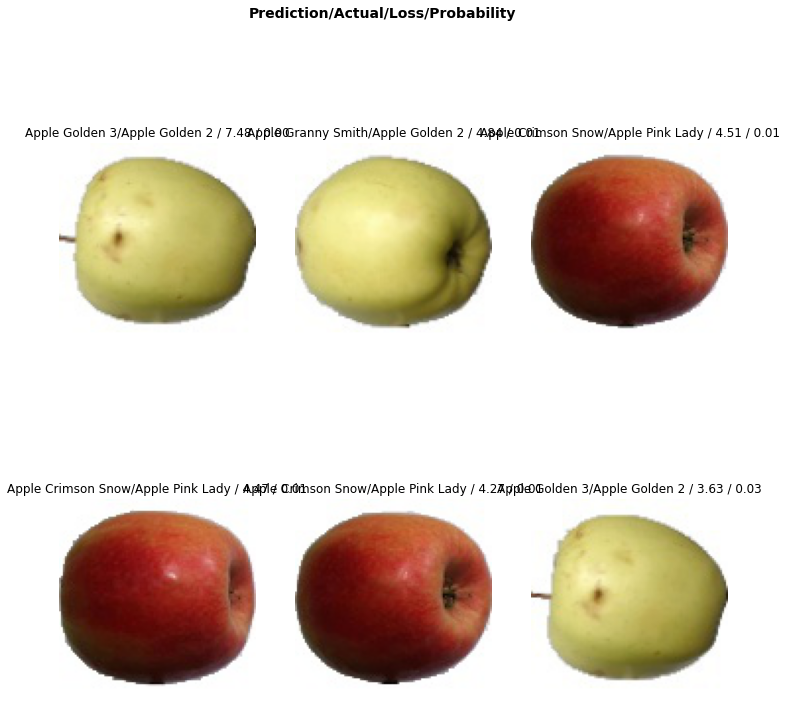

In [49]:
interp.plot_top_losses(6)

**A confusion matrix gives information of what are the classes or cases we predicted right or wrong on the validation data,** **which provides insights for to get how our model can perform in real world**

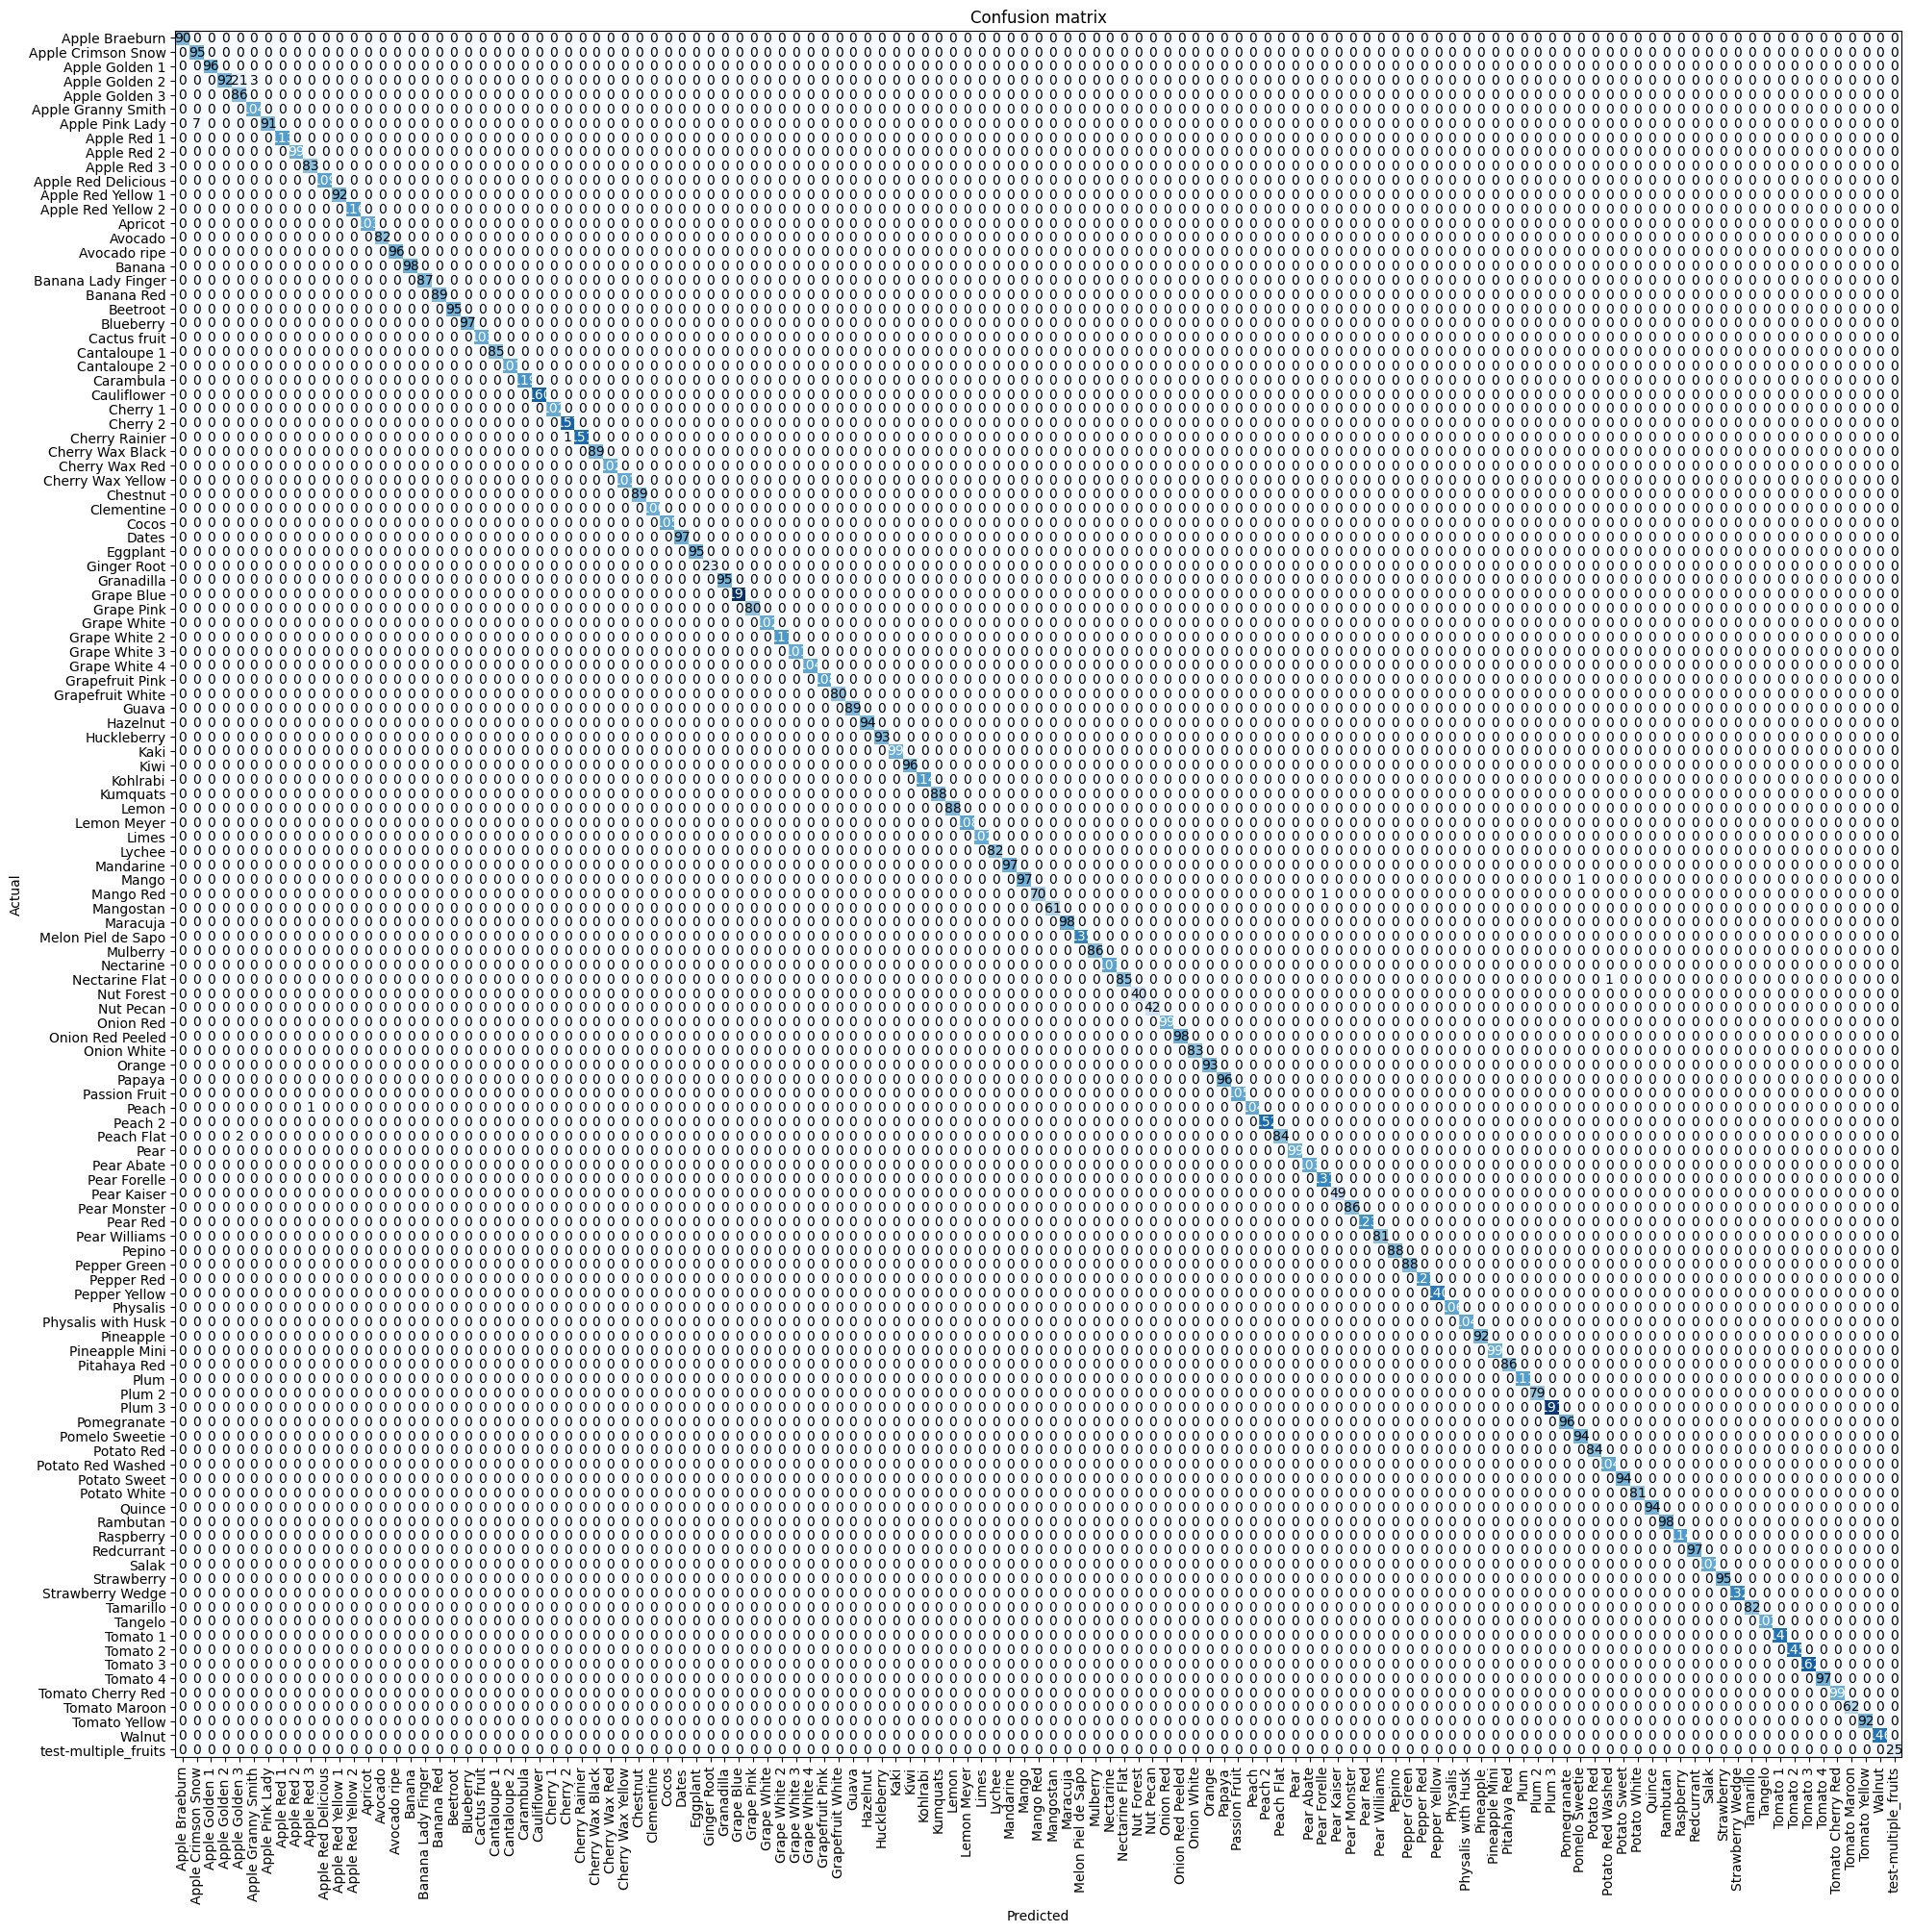

In [51]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=100)

In [52]:
interp.most_confused()

[('Apple Golden 2', 'Apple Golden 3', 21),
 ('Apple Pink Lady', 'Apple Crimson Snow', 7),
 ('Apple Golden 2', 'Apple Granny Smith', 3),
 ('Peach Flat', 'Apple Golden 3', 2),
 ('Cherry Rainier', 'Cherry 2', 1),
 ('Mango', 'Pomelo Sweetie', 1),
 ('Mango Red', 'Pear Forelle', 1),
 ('Nectarine Flat', 'Potato Red Washed', 1),
 ('Peach', 'Apple Red 3', 1)]

**Here the above `most_confused()` function gives output of where our model is performed very bad. For eg: In the above case, our model gone wrong predicting `Apple Golden 2` where it predicted as `Apple Golden 3` for 21 times in the validation data.**

In [0]:
learner_34.unfreeze()

**I unfreezed the generated model to demonstrate the learning rate finder algorithm invented by Leslie Smith which is implemented in fastai.**

In [55]:
learner_34.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


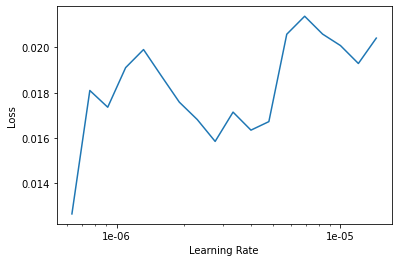

In [57]:
learner_34.recorder.plot()

In [59]:
learner_34.fit_one_cycle(5, max_lr=slice(1.5e-06, 2.5e-06))

epoch,train_loss,valid_loss,accuracy,time
0,0.031914,0.007022,0.997937,04:06
1,0.023106,0.010127,0.996700,04:04
2,0.022040,0.004793,0.998102,04:01
3,0.019121,0.006720,0.997525,04:03
4,0.020559,0.005699,0.998102,03:55


**There is an imrovement from 99.6% to 99.8% accuracy as we took a range of `learning_rate` found using the learning rate finder.**

**The generated model can be saved using the below command, `.save('name_to_save')` method. This stores the model with a `name_to_save.pth` which containst the weights of the model which we fitted upon. This saved model weights can be loaded to find predictions in any api or in production.**

In [0]:
learner_34.save('Fruits_120_50')